In [2]:
import pandas as pd
import random as rnd
import networkx as nx
from networkx.algorithms import bipartite #we load the bipartite algorithms to facilitate writing the code
import numpy as np
import matplotlib.pyplot as plt
from Functions import *

# Random networks and null models 

When trying to stablish if a pattern found in a network is statistically significant, you will need to compare the real networks structure with different benchmarks. These benchmark usually rely on placing the interaction in a somewhat randomized fashion.

## Python's `random` module

Many network models rely on randomness in their generative algorithms. Python's [random module](https://docs.python.org/3.7/library/random.html) provides four key functions of use when coding network models.

### `random.random`

Often in an algorithm, we need something to happen with some probability $p$. The canonical way to decide whether or not such an event happens is to generate a random number $r$ between 0 and 1, and if $r < p$, then the event occurs. The [random.random()](https://docs.python.org/3.7/library/random.html#random.random) function returns just such a random number in the interval [0, 1).

For a simple example, consider an unfair coin that comes up heads 75% of the time. We can write the following code to flip such a coin 10 times, reporting the outcome each time:

In [3]:
p = 0.75

# Do this 10 times
for _ in range(10):
    r = rnd.random()
    if r < p:
        print('Heads')
    else:
        print('Tails')

Heads
Tails
Heads
Tails
Tails
Heads
Heads
Tails
Heads
Tails


As we would expect from a random process, executing the previous cell again will generate a different sequence of flips -- each one is independently generated.

###  `random.choice`

When we have a population of discrete choices and we need to **select one at random**, we use [random.choice()](https://docs.python.org/3.7/library/random.html#random.choice). For example, instead of "[eeny, meeny, miny, moe](https://en.wikipedia.org/wiki/Eeny,_meeny,_miny,_moe)," we can use random.choice to choose a random name:

In [3]:
names = ['Katniss', 'Prim', 'Madge']
rnd.choice(names)

'Prim'

### `random.sample`

If we have a collection and we need to select **more than one element without replacement**, we use [random.sample()](https://docs.python.org/3.7/library/random.html#random.sample). For example, to choose two nodes at random from the nodes in a graph, we can use the following:

In [4]:
G = nx.cycle_graph(5)
sampled_nodes = rnd.sample(list(G.nodes), 2)
sampled_nodes

[1, 0]

### `random.choices`

We use [random.choices()](https://docs.python.org/3.7/library/random.html#random.choices) when we need to choose an element from a collection **when the chances of selecting each element are not identical**.

For an example, remember in the hunger games where each kid has her name introduced a different number of times in the lotery urn. We can simulate ten different draws of the selection, replacing the drawn ticket each time, with the following code:

In [5]:
names =['Katniss', 'Prim', 'Madge']
tickets = [15, 1, 3] #katniss has her name in the urn 10 times, while the others have much less chances

for i in range(10):
    print(rnd.choices(names, tickets))

['Madge']
['Katniss']
['Katniss']
['Prim']
['Katniss']
['Katniss']
['Katniss']
['Katniss']
['Madge']
['Katniss']


Running the above cell should give what we expect: Katniss is chosen most often, with Bob winning some times, and Alice winning occasionally. Of course this outcome depends on the luck of the draw!

By specifying the keyword argument `k=`, we can choose *k* items from the collection *with replacement*:

In [6]:
rnd.choices(names, tickets, k=20)

['Prim',
 'Katniss',
 'Katniss',
 'Katniss',
 'Katniss',
 'Katniss',
 'Katniss',
 'Katniss',
 'Katniss',
 'Prim',
 'Katniss',
 'Katniss',
 'Katniss',
 'Katniss',
 'Katniss',
 'Katniss',
 'Katniss',
 'Katniss',
 'Katniss',
 'Madge']

The weights provided to `random.choices` do not have to be integers -- any numeric weights are fine.

## Random Graph (Erdos-Renyi)


The random network model, as formulated by Erdos, Renyi has two parameters: the **number of nodes $N$**, and the **link probability $p$**. 
The algorithm for creating this type of network is as follows:

1. Select a pair of nodes, say i and j.
2. Generate a random number r between 0 and 1. If r < p, then add a link between i and j.
3. Repeat (1) and (2) for all pairs of nodes.

In networkX it is already implemented in the function `.gnp_random_graph`



The graph has 26 edges


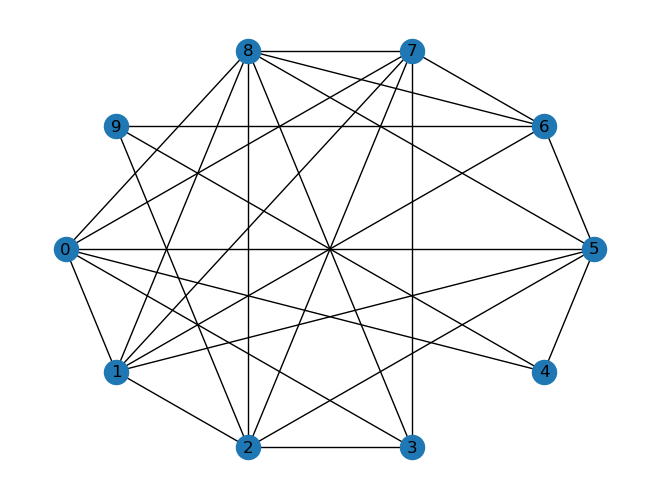

In [7]:
N=10
p=0.5
R1=nx.gnp_random_graph(N,p,directed=False)
pos=nx.shell_layout(R1)
nx.draw(R1, pos, with_labels=True)
L=R1.number_of_edges()
print("The graph has %s edges" % L)

Soemtimes is usefull to see the network as a matrix. In this case the model gives each element $A_ij$ a probability of existence $p$ which is **INDEPENDENT** of everything else. Let's see both things representing them togheter.

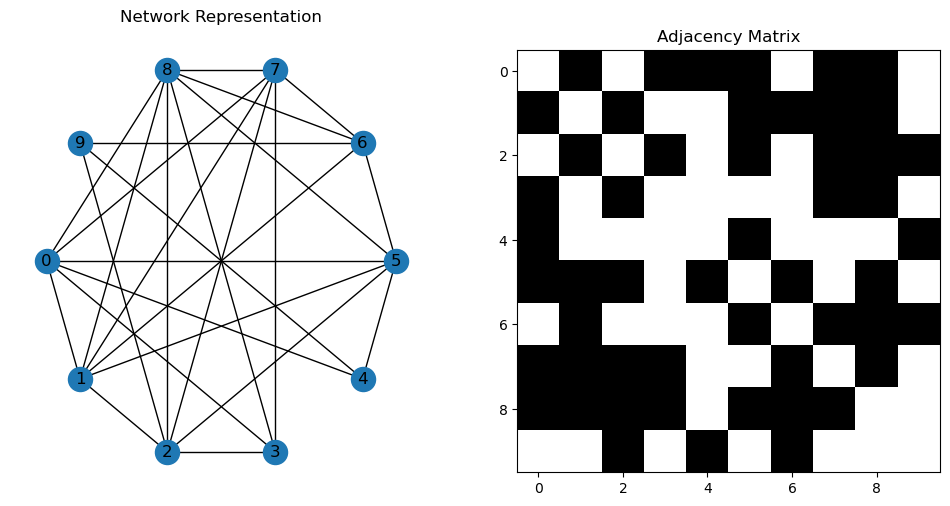

In [8]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

#plotting the network
nx.draw(R1, pos, with_labels=True, ax=ax1) #plot the network in axis1 (ax=ax1)
ax1.set_title('Network Representation')
#We can visualize the amtrix like this
adj_matrix = nx.to_numpy_array(R1) #create the adjacency matrix (we can use this because is unipartite and undirected, see Lesson01A for other cases
ax2.imshow(adj_matrix, cmap='Greys', interpolation='none')
ax2.set_title('Adjacency Matrix')

plt.show()

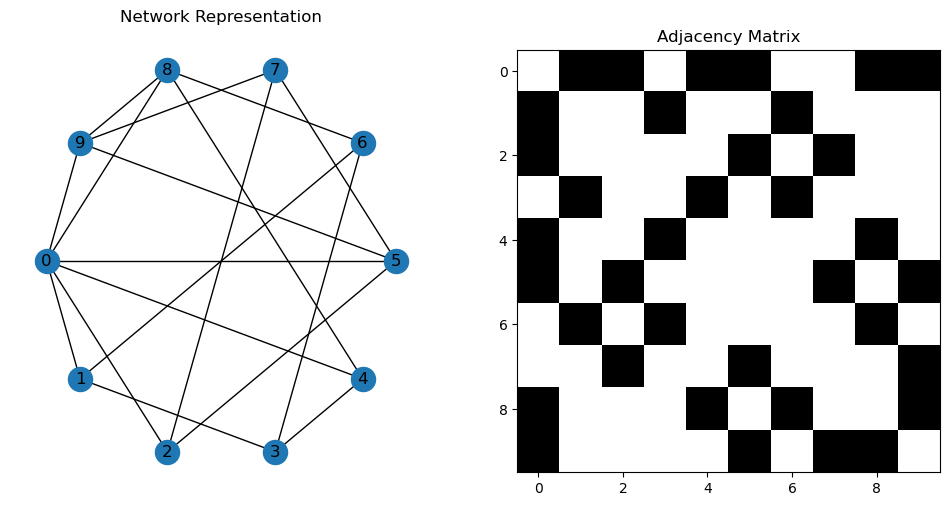

The graph has 18 edges


In [9]:
R1=nx.gnp_random_graph(N,p,directed=False) #The probability fo the existence of each link is independent of everything!!, let's see another trial
L=R1.number_of_edges()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

#plotting the network
nx.draw(R1, pos, with_labels=True, ax=ax1) #plot the network in axis1 (ax=ax1)
ax1.set_title('Network Representation')
#We can visualize the amtrix like this
adj_matrix = nx.to_numpy_array(R1) #create the adjacency matrix (we can use this because is unipartite and undirected, see Lesson01A for other cases
ax2.imshow(adj_matrix, cmap='Greys', interpolation='none')
ax2.set_title('Adjacency Matrix')

plt.show()

print("The graph has %s edges" % L) #try running this code more than once ans see what happens

As you see, the number of links chan ghance slightly. If you want to keep **exactly the number of links**, use the `gnm.random_graph()`

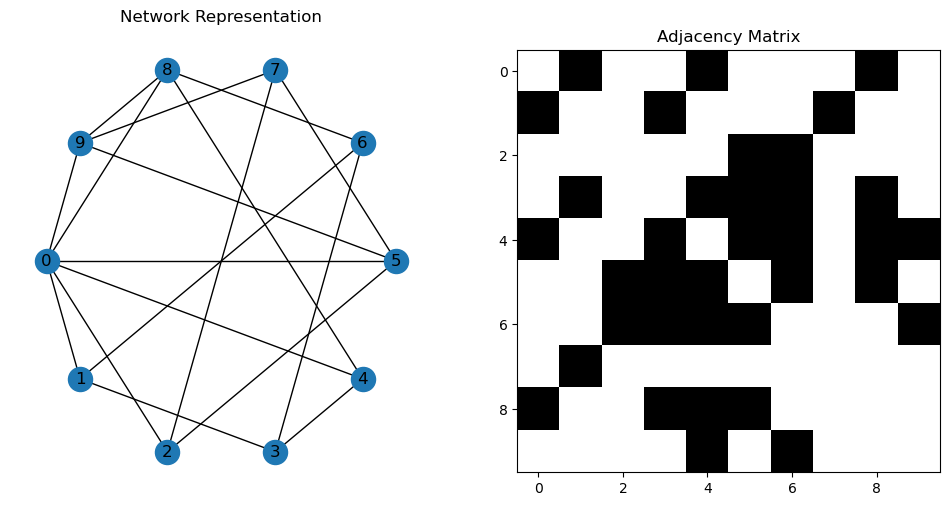

The graph has 18 edges


In [10]:
R2=nx.gnm_random_graph(N,L,directed=False) #try  directed too
L=R2.number_of_edges()
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

#plotting the network
nx.draw(R1, pos, with_labels=True, ax=ax1) #plot the network in axis1 (ax=ax1)
ax1.set_title('Network Representation')
#We can visualize the amtrix like this
adj_matrix = nx.to_numpy_array(R2) #create the adjacency matrix (we can use this because is unipartite and undirected, see Lesson01A for other cases
ax2.imshow(adj_matrix, cmap='Greys', interpolation='none')
ax2.set_title('Adjacency Matrix')

plt.show()
print("The graph has %s edges" % L) #try running this code more than once ans see what happens

<div class="alert alert-block alert-success"><b>Up to you: </b>
<h4> Exercise 18</h4>
    
Let's explore how are the random version of real world networks.  
- 1. Create the random version of the St Marks stuary food-web (the file location is provided) that keeps fixed both the number of species and the number of links. 
    
    Hint 1: we already loaded the network in lesson 1A, and got the number of nodes and links in lesson 1B.
    
    Hint 2: Note that we are working with a **directed graph**. 
    

In [ ]:
filename="./data/WoL_StMarks/st_marks_Ilist.csv" 
### your code here below 
# please, name your randomized network FW_R1 

In [ ]:
# %load ./snippets/ex18.py


Ok, now we have a randomized version of the netwokr, let's see how different my empirical network and the random one is. Let's look for example at the basic building blocks in directed networks, network motifs!


In [ ]:
motifs = {
    'S1': nx.DiGraph([(1,2),(2,3)]),
    'S2': nx.DiGraph([(1,2),(1,3),(2,3)]),
    'S3': nx.DiGraph([(1,2),(2,3),(3,1)]),
    'S4': nx.DiGraph([(1,2),(3,2)]),
    'S5': nx.DiGraph([(1,2),(1,3)])
 }
Motifs=pd.Series(mcounter_py3(FW,motifs),name="EMP")
Motifs_R1=pd.Series(mcounter_py3(FW_R1,motifs), name="RND_1")

In [ ]:
#lets build a dataframe with both data, so we can compare better:
Motif_df=pd.concat([Motifs, Motifs_R1], axis=1)
Motif_df

In [ ]:
Motif_df.plot(logy=False)


And what about another relevant thing in trophic networks? The trophic level of species

In [ ]:
#let's try measuring the distribution of trophic levels, and the mean chain length
TL=pd.Series(nx.centrality.trophic_levels(FW))#get trophic level of node
TL_R1=pd.Series(nx.centrality.trophic_levels(FW_R1))#get trophic level of node 

In [ ]:
#create histograms: lesson2A.24 
bins = np.arange(min(TL.min(),TL_R1.min()), max(TL.max(),TL_R1.max()) + 2, 1)#fix width of bin to 1 
#This above can raise an error if the trophic levels are not well defined in the random version!!
hist, bin_edges = np.histogram(TL, bins=bins)
histr, bin_edges = np.histogram(TL_R1, bins=bins)

plt.plot(bin_edges[:-1],histr,'o-',color="k",alpha=0.3,label="GNM random")
plt.plot(bin_edges[:-1],hist,'o-',color="r",alpha=0.3,label="Empirical")
plt.title("Trophic level distribution")
plt.xlabel("Trophic level of node (l)")
plt.legend()
plt.ylabel("Number of nodes with trophic level (l)")
plt.show()

In [ ]:
TL_R1

Ok, so maybe they are too diferent even to try to compare, let's take a look at both matrices to have a better idea

In [ ]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

#plotting the network
#We can visualize the amtrix like this (see lesson01A
adj_matrix1=nx.to_pandas_adjacency(FW)
#order species by increasin kin
ordered_species=list(adj_matrix1.sum(axis=0).sort_values(ascending=True).index)
adj_matrix1_ordered=adj_matrix1.loc[ordered_species,ordered_species]
ax1.imshow(adj_matrix1_ordered, cmap='Greys', interpolation='none')
ax1.set_title('Empirical')
ax1.set_ylabel("Prey")
ax1.set_xlabel("Pred.")
#We can visualize the amtrix like this
adj_matrix2 = nx.to_pandas_adjacency(FW_R1) #create the adjacency matrix (we can use this because is unipartite and undirected, see Lesson01A for other cases
ax2.imshow(adj_matrix2, cmap='Greys', interpolation='none')
ax2.set_title('Randomization')
ax1.set_ylabel("Prey")
ax1.set_xlabel("Pred.")
plt.show()

We will see how to build a more refined model next, but before, let's work with bipartite networks too.

## Random Graph of bipartite networks
For bipartite networks we need to use the bipartite algorithms! For the random network with fixed link probabiltiy we have `bipartite.random.graph(top_nodes, lower_nodes)`. Let's see how it works

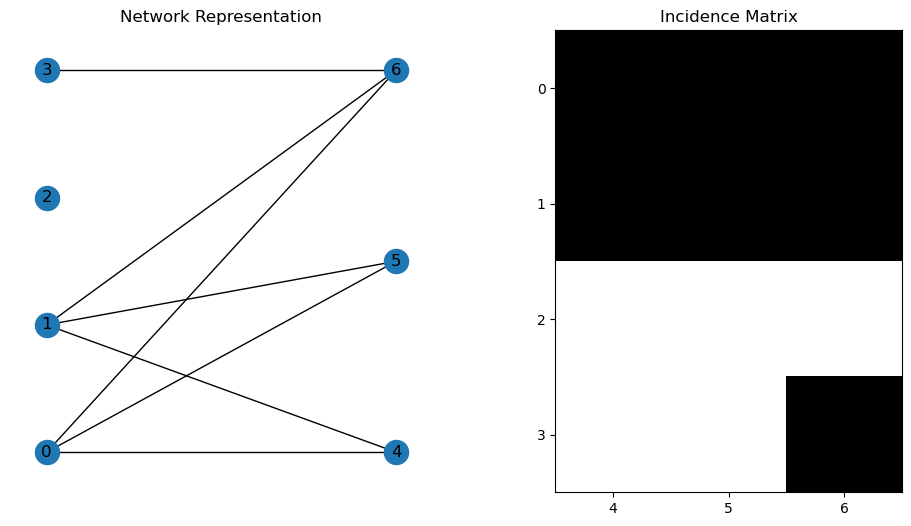

The graph has 7 edges


In [11]:
#random bipartite graph with link probability
Na=4
Nb=3
p=0.7
#create the random graph in networkx
B=bipartite.random_graph(Na,Nb,p, directed=False)#create the random network
top_nodes = {n for n, d in B.nodes(data=True) if d["bipartite"] == 0}#get nodes with bipartite==0
bottom_nodes = set(B) - top_nodes
pos=nx.bipartite_layout(B, top_nodes)#get position of nodes
L=B.number_of_edges()
#create incidence matrix from bipartite network (see lesson01A)
incidence_matrix = nx.to_pandas_adjacency(B).loc[list(top_nodes), list(bottom_nodes)]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
nx.draw(B, pos, with_labels=True, ax=ax1) #plot the network in axis1 (ax=ax1)
ax1.set_title('Network Representation')
#We can visualize the amtrix like this
incidence_matrix = nx.to_pandas_adjacency(B).loc[list(top_nodes), list(bottom_nodes)]
#inc_matrix = bipartite.biadjacency_matrix(B, row_order=list(top_nodes), column_order=list(bottom_nodes)).toarray()
ax2.imshow(incidence_matrix, cmap='Greys', interpolation='none')
ax2.set_title('Incidence Matrix')
# Set the tick labels for rows and columns
plt.yticks(ticks=np.arange(len(list(top_nodes))), labels=list(top_nodes), rotation=0)
plt.xticks(ticks=np.arange(len(list(bottom_nodes))), labels=list(bottom_nodes))

plt.show()
print("The graph has %s edges" % L) #try running this code more than once ans see what happens

<div class="alert alert-block alert-success"><b>Up to you: </b>
<h4> Exercise 19</h4>
    
Let's explore how are the random version of real world networks.     
 - 1. Create the random version of a bipartite network of pollination in Doñana (filename provided) that keeps **fixed the number of links** and **the number of nodes** (`bipartite.gnmk_random_graph(top_nodes, bottom_nodes`)). 
    
    
- 2. Once you have it plot the degree distribution of the original network and of the randomized version. 
    
- 3. Finally plot also the cumulatice degree ditribution of both networks
    
</div>

In [14]:
#the network is stored in matrix form in this file
filename="./data/pollination/Herrera_Donana.csv"
##1.A Read the matrix and create the bipartite Network #Lesson01_A
##1.B Get the number of nodes and number of links, #lesson01_B
##1.C Create the random version of the network using the NL null model
#   B_NL=bipartite.gnmk_random_graph(N,L)
##2.A Retrieve the pollinator degree sequence of the networks # hint:take into consideration that while in the real network species have names, 
# in the randomized version they have only numbers. Remember that you can retrieve the nodes in one set by looking at their bipartite attribute. #Lesson02A  
##2.B build the histogram of degree of both networks from the series of node degree #Lesson02A
##3.A build the cumulative degree distribution of both networks #Lesson02A

In [15]:
# %load ./snippets/ex19a.py
#1. Read the file and sotre in dataframe
Idf=pd.read_csv(filename, header=0, index_col=0)
#print(Idf.head())

#2. Create bipartite network
# Initialize an empty bipartite graph
B = nx.Graph()
# Add producers (rows) and consumers (columns) as nodes
plants = Idf.index
animals = Idf.columns

# Add nodes with a bipartite identifier
B.add_nodes_from(plants, bipartite="plant")  # Set for producers
B.add_nodes_from(animals, bipartite="animal")  # Set for consumers
# Add edges for non-zero interactions, we can also use the matrix directly
for plant in plants:
    for animal in animals:
        if Idf.loc[plant, animal] != 0:
            B.add_edge(plant, animal)

#3. Get the number of nodes in each set an the number of links
Nplants=len(plants)
Nanimals=len(animals)
L=B.number_of_edges()
print("Np=%s Na=%s, L=%s" %(Nplants,Nanimals,L))

# 4. Generate the random version of the network
B_R1=bipartite.gnmk_random_graph(Nplants, Nanimals, L)
# to force that the graph uses bipartite="plant" or bipartite="animal" instead of the o and 1 by default we can do:
for n in range(Nplants):
    B_R1.nodes[n]["bipartite"]="plant"
for n in range(Nplants,Nplants+Nanimals):
    B_R1.nodes[n]["bipartite"]="animal"

Np=26 Na=179, L=412


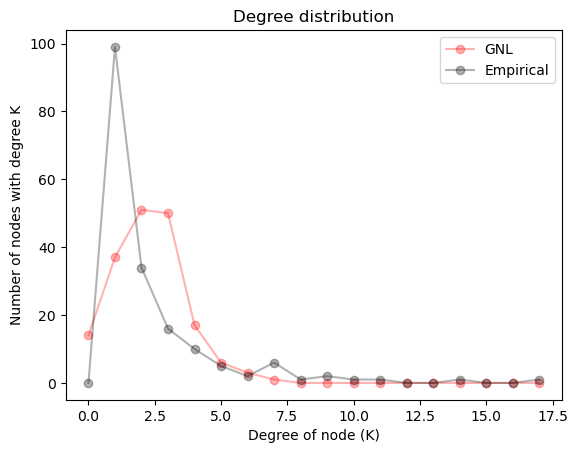

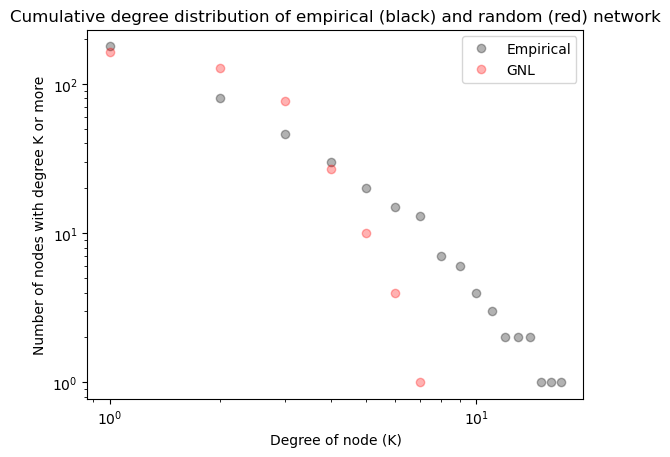

In [17]:
# %load ./snippets/ex19b.py
#2.A Retrieve the degree sequences of polinators
#in te original network I know the animal nodes
Ka=pd.Series(dict(B.degree(animals))).sort_values(ascending=False)
#retrieve animal nodes only #LEsson01A, 24 #LEsson01A, 24
animal_nodes = {n for n, d in B_R1.nodes(data=True) if d["bipartite"] == "animal"}
Ka_R1=pd.Series(dict(B_R1.degree(animal_nodes))).sort_values(ascending=False)
#2.B build the histograms - lesson2A.24
bins = np.arange(min(Ka.min(),Ka_R1.min()), max( Ka.max(),Ka_R1.max()) + 2, 1)#fix width of bin to 1
hist, bin_edges = np.histogram(Ka, bins=bins)
histr, bin_edges = np.histogram(Ka_R1, bins=bins)

plt.plot(bin_edges[:-1],histr,'o-',color="r",alpha=0.3,label="GNL")
plt.plot(bin_edges[:-1],hist,'o-',color="k",alpha=0.3,label="Empirical")
plt.title("Degree distribution")
plt.xlabel("Degree of node (K)")
plt.ylabel("Number of nodes with degree K")
plt.legend()
plt.show()

#Compute the cumulative sum, but in reverse order to count values greater than or equal
cumulative_hist = np.cumsum(hist[::-1])[::-1]
cumulative_histr = np.cumsum(histr[::-1])[::-1]
#plot
plt.plot(bin_edges[:-1], cumulative_hist, 'o',color="k",alpha=0.3,label="Empirical")
plt.plot(bin_edges[:-1], cumulative_histr, 'o',color="r",alpha=0.3,label="GNL")
plt.xscale('log')
plt.yscale('log')
plt.title("Cumulative degree distribution of empirical (black) and random (red) network")
plt.xlabel("Degree of node (K)")
plt.ylabel("Number of nodes with degree K or more") #
plt.legend()
plt.show()

As we see, some propoerties like the size of the network, or the number of links, are the same in the random version of the network, while others like the degree distribution, are not. 

## Configuration model 

As we have seen already, the degree distribution of the network is very relevant and can detemrine many other features of the networks. The configuration model take this into condieration when generating a null model. The configuration model generates a random graph with a given degree distribution. For that we need to provide the degree sequence (a list of the degree of each node) and the number of nodes in the graph. Networkx already has an implemented algorithm `nx.configuration_model(degree_sequence)`

111


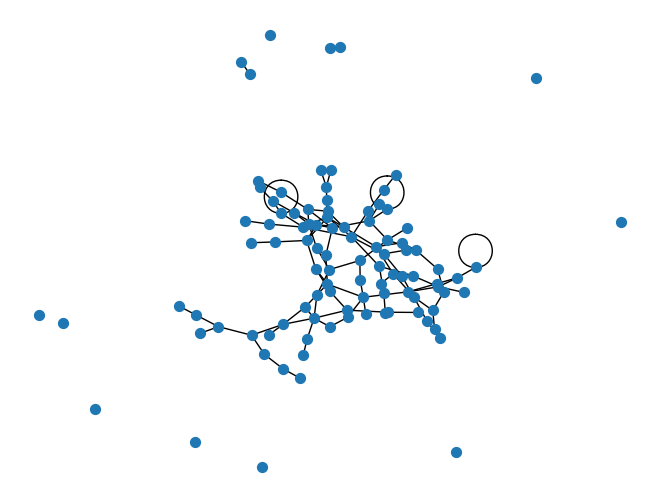

In [19]:
# Parameters for the graph
N = 100  # Number of nodes
p = 0.025# Probability for the binomial distribution (adjust as needed)

degree_sequence = np.random.binomial(N - 1, p, size=N)

# Ensure the sum of degrees is even, since it's required for the configuration model as you need to connect all nodes' stubs!!
if sum(degree_sequence) % 2 != 0:
    # If the sum is odd, add 1 to a random element to make it even
    degree_sequence[np.random.randint(0, N)] += 1

G = nx.configuration_model(degree_sequence, create_using=nx.Graph()) #avoid multiple edges problem
pos=nx.spring_layout(G)
nx.draw(G,pos,node_size=50)
print(G.number_of_edges())


135


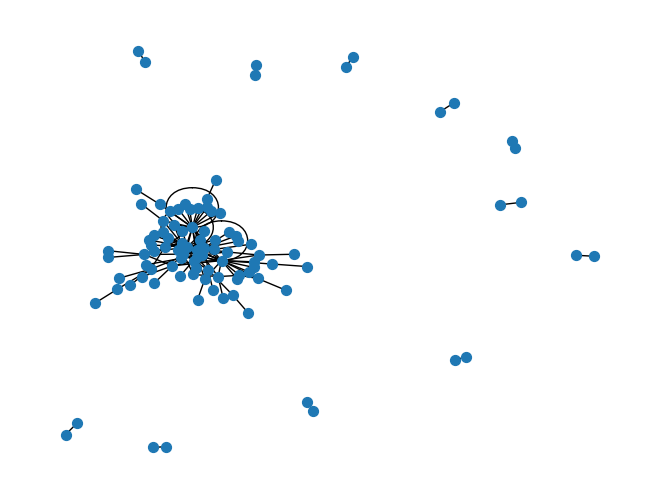

In [20]:
#now lets change the degree distribution!
exponent = 2.1  # Power-law exponent (commonly between 2 and 3 for scale-free networks)
# Generate a degree sequence from a power-law distribution
# The formula for a scale-free degree sequence: x = k_min * (1 - r)^(1/(1 - alpha))
degree_sequence = np.random.zipf(a=exponent, size=N)
# Ensure that the degree sequence is appropriate for the configuration model
# Adjust the degrees if they exceed the possible maximum for N-1 neighbors
degree_sequence = np.clip(degree_sequence, 1, N - 1)
# Ensure the sum of degrees is even, which is required for the Configuration Model
if sum(degree_sequence) % 2 != 0:
    # If the sum is odd, add 1 to a random element to make it even
    degree_sequence[np.random.randint(0, N)] += 1
# Create a graph using the configuration model
G = nx.configuration_model(degree_sequence, create_using=nx.Graph())

pos=nx.spring_layout(G)
nx.draw(G,pos, node_size=50)
print(G.number_of_edges())

We can use the **configuration model** to generate a randomized version of an empirical network. Let's create a random version of the St Marks food-web using the configuration model.

In [21]:
#Get the In and OUT degree sequences, that we are going to use to create 
Kin=pd.Series(dict(FW.in_degree()))
Kout=pd.Series(dict(FW.out_degree()))

#create the randomized version
FW_R2 = nx.directed_configuration_model(Kin, Kout, create_using=nx.DiGraph())

NameError: name 'FW' is not defined

In [ ]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

#plotting the network
#We can visualize the amtrix like this (see lesson01A
adj_matrix1=nx.to_pandas_adjacency(FW)
#order species by increasin kin
ordered_species=list(adj_matrix1.sum(axis=0).sort_values(ascending=True).index)
adj_matrix1_ordered=adj_matrix1.loc[ordered_species,ordered_species]
ax1.imshow(adj_matrix1_ordered, cmap='Greys', interpolation='none')
ax1.set_title('Empirical')
ax1.set_ylabel("Prey")
ax1.set_xlabel("Pred.")
#We can visualize the amtrix like this
adj_matrix2 = nx.to_pandas_adjacency(FW_R2) #create the adjacency matrix (we can use this because is unipartite and undirected, see Lesson01A for other cases
ax2.imshow(adj_matrix2, cmap='Greys', interpolation='none')
ax2.set_title('Randomization')
ax1.set_ylabel("Prey")
ax1.set_xlabel("Pred.")
plt.show()

Looks like they are more similar! However, even if more things remain similar in the empirical and the randomization, there are still structures that looks different in boht of them. For example how species are distributed in trophic levels! (but at least now we could get trophic levels)

In [ ]:
#let's try measuring the distribution of trophic levels, and the mean chain length
TL=pd.Series(nx.centrality.trophic_levels(FW))#get trophic level of node
TL_R2=pd.Series(nx.centrality.trophic_levels(FW_R2))#get trophic level of node

#create histograms: lesson2A.24
bins = np.arange(min(TL.min(),TL_R2.min()), max( TL.max(),TL_R2.max()) + 2, 1)#fix width of bin to 1
hist, bin_edges = np.histogram(TL, bins=bins)
histr, bin_edges = np.histogram(TL_R2, bins=bins)

plt.plot(bin_edges[:-1],histr,'o-',color="k",alpha=0.3,label="Random")
plt.plot(bin_edges[:-1],hist,'o-',color="r",alpha=0.3,label="Empirical")
plt.title("Trophic level distribution")
plt.xlabel("Trophic level of node (l)")
plt.legend()
plt.ylabel("Number of nodes with trophic level (l)")
plt.show()

And if we look at the motifs again we see that the randomized version is not much better

In [ ]:
Motifs_R2=pd.Series(mcounter_py3(FW_R2,motifs), name="RND_2")

In [ ]:
Motif_df=pd.concat([Motif_df,Motifs_R2], axis=1)

In [ ]:
Motif_df.plot(logy=False)
plt.show()

In [ ]:
#let's compute the "diameter", that is the maximum of the minimum shortests paths. In directed networks like this one sometimes we cannot measure directly the diameter 
#as they are not strongly connected. In these cases we can compute the excentricity of each node and get the maximum
# Compute the eccentricity for each node in the original foodweb
eccentricities = {}
for node in FW.nodes:
    lengths = nx.single_source_shortest_path_length(FW, node)
    if lengths:
        eccentricities[node] = max(lengths.values())

# The pseudo-diameter is the maximum eccentricity
pseudo_diameter = max(eccentricities.values())

# Compute the eccentricity for each node in the randomized foodweb
eccentricitiesrnd = {}
for node in FW_R2.nodes:
    lengths = nx.single_source_shortest_path_length(FW_R2, node)
    if lengths:
        eccentricitiesrnd[node] = max(lengths.values())

# The pseudo-diameter is the maximum eccentricity
pseudo_diameterrnd = max(eccentricitiesrnd.values())

print("The diameter of the foodweb is %s and of a randomized version %s" %(pseudo_diameter,pseudo_diameterrnd))

## Configuration model of bipartite graphs

To generate a bipartite network in the configuration model we will use the function `bipartite.configuration_model(aseq,bseq))`, that takes as vaiables the degree sequences of the top and bottom nodes. As before, we ned to create the two degree sequences (either reading them from a real network, or by sampling numbers from a given distribution).

<div class="alert alert-block alert-success"><b>Up to you: </b>
<h4> Exercise 20</h4>
    
- 1. Create a random version of the pollination network we loaded keeping fized the number of nodes (**N**), and the degree dsitributions (**$P(K_a)$** and **$P(K_p)$**). 

- 2. Repeat what you did in exercise 19: plot the degree distribution and the cumulative degree distribution togheter with the empirical one, and the one from the random model
    
Hint:remember you need the degree sequence of both plants and pollinators
    
</div>

In [ ]:
#yourcode here 
# name the new random network B_R2


In [24]:
# %load ./snippets/ex20a.py
Ka=pd.Series(dict(B.degree(animals))).sort_values(ascending=False)
Kp=pd.Series(dict(B.degree(plants))).sort_values(ascending=False)
B_R2=bipartite.configuration_model(Kp,Ka)
# to force that the graph uses bipartite="plant" or bipartite="animal" instead of the o and 1 by default we can do:
for n in range(Nplants):
    B_R2.nodes[n]["bipartite"]="plant"
for n in range(Nplants,Nplants+Nanimals):
    B_R2.nodes[n]["bipartite"]="animal"

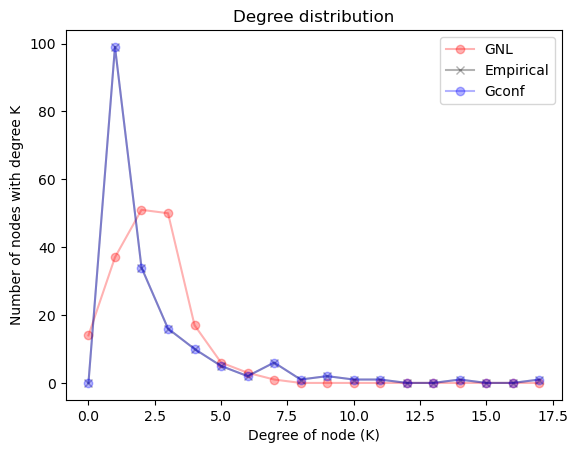

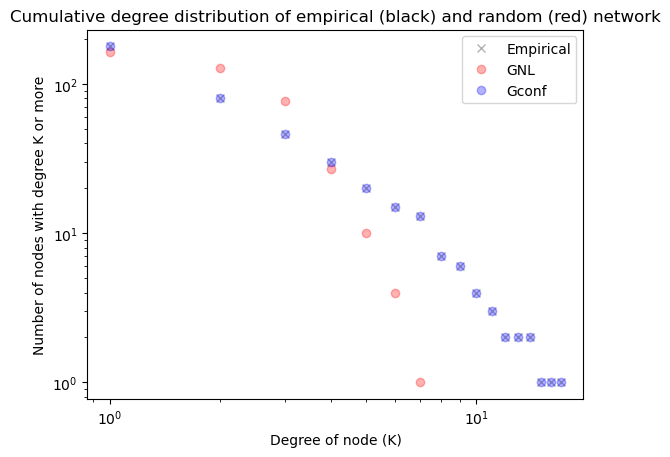

In [25]:
# %load ./snippets/ex20b.py
Ka_R2=pd.Series(dict(B_R2.degree(animal_nodes))).sort_values(ascending=False)
#2.B build the histograms - lesson2A.24
bins = np.arange(min(Ka.min(),Ka_R1.min(),Ka_R2.min()), max( Ka.max(),Ka_R1.max(),Ka_R2.min()) + 2, 1)#fix width of bin to 1
hist, bin_edges = np.histogram(Ka, bins=bins)
histr1, bin_edges = np.histogram(Ka_R1, bins=bins)
histr2, bin_edges = np.histogram(Ka_R2, bins=bins)

plt.plot(bin_edges[:-1],histr1,'o-',color="r",alpha=0.3,label="GNL")
plt.plot(bin_edges[:-1],hist,'x-',color="k",alpha=0.3,label="Empirical")
plt.plot(bin_edges[:-1],histr2,'o-',color="b",alpha=0.3,label="Gconf")
plt.title("Degree distribution")
plt.xlabel("Degree of node (K)")
plt.ylabel("Number of nodes with degree K")
plt.legend()
plt.show()

#Compute the cumulative sum, but in reverse order to count values greater than or equal
cumulative_hist = np.cumsum(hist[::-1])[::-1]
cumulative_histr1 = np.cumsum(histr1[::-1])[::-1]
cumulative_histr2 = np.cumsum(histr2[::-1])[::-1]

#plot
plt.plot(bin_edges[:-1], cumulative_hist, 'x',color="k",alpha=0.3,label="Empirical")
plt.plot(bin_edges[:-1], cumulative_histr1, 'o',color="r",alpha=0.3,label="GNL")
plt.plot(bin_edges[:-1], cumulative_histr2, 'o',color="b",alpha=0.3,label="Gconf")
plt.xscale('log')
plt.yscale('log')
plt.title("Cumulative degree distribution of empirical (black) and random (red) network")
plt.xlabel("Degree of node (K)")
plt.ylabel("Number of nodes with degree K or more") #
plt.legend()
plt.show()

Let's try measuring other global level metrics that are relevant in bipartite networks, nestedness for example (as in lesson 2B)

In [26]:
bottom_nodes = {n for n, d in B.nodes(data=True) if d["bipartite"] == "plant"}#get nodes with bipartite==0
eta_emp=nestedness_bipartite(B,bottom_nodes)
print(eta_emp)

0.303596214511041


In [27]:
bottom_nodesR = {n for n, d in B_R1.nodes(data=True) if d["bipartite"] == "plant"}#get nodes with bipartite==0
eta_R1=nestedness_bipartite(B_R1,bottom_nodesR)
print(eta_R1)

0.12504247366632687


In [28]:
bottom_nodesR = {n for n, d in B_R2.nodes(data=True) if d["bipartite"] == "plant"}#get nodes with bipartite==0
eta_R2=nestedness_bipartite(B_R2,bottom_nodesR)
print(eta_R2)

0.2870347847239115


## Random graphs that keep the degree sequence

In some cases you may want to keep exactly the degree sequence of interest. In this case the left possibility is to swap the interaction between different nodes, but keeping the number of connections each. USe the function  `rewire_constant_Kseq` to generate a new network with the same degree sequence.

In [ ]:
FW_R3=randomization_constant_Kseq(FW, directed=True)

In [ ]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

#plotting the network
#We can visualize the amtrix like this (see lesson01A
adj_matrix1=nx.to_pandas_adjacency(FW)
#order species by increasin kin
ordered_species=list(adj_matrix1.sum(axis=0).sort_values(ascending=True).index)
adj_matrix1_ordered=adj_matrix1.loc[ordered_species,ordered_species]
ax1.imshow(adj_matrix1, cmap='Greys', interpolation='none')
ax1.set_title('Empirical')
ax1.set_ylabel("Prey")
ax1.set_xlabel("Pred.")
#We can visualize the amtrix like this
adj_matrix3 = nx.to_pandas_adjacency(FW_R3) #create the adjacency matrix (we can use this because is unipartite and undirected, see Lesson01A for other cases
ax2.imshow(adj_matrix3, cmap='Greys', interpolation='none')
ax2.set_title('Randomization')
ax1.set_ylabel("Prey")
ax1.set_xlabel("Pred.")
plt.show()

Let's see the type of motifs in this randomized network

In [ ]:
Motifs_R3=pd.Series(mcounter_py3(FW_R3,motifs), name="RND_3")

In [ ]:
Motif_df=pd.concat([Motif_df,Motifs_R3], axis=1)

In [ ]:
Motif_df

In [ ]:
Motif_df.plot(logy=False)
plt.show()

<div class="alert alert-block alert-success"><b>Up to you: </b>
<h4> Exercise 21</h4>
    
- 1. Create the random version of the pollination network keeping fixed the number of nodes (*$N$*), number of links (*$L$*), and exact degree sequences (*$K_a$*, *$K_p$*).
For bipartite networks use `B_R3=randomization_constant_Kseq_bipart(B,bottom_nodes,top_nodes)`

- 2. Compute its nestedness
    
</div>

In [ ]:
#your code here.
#please name you new random network B_R3


In [ ]:
# %load ./snippets/ex21.py


In [ ]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

#plotting the network
#We can visualize the amtrix like this (see lesson01A
I_matrix1=nx.to_pandas_adjacency(B).loc[list(bottom_nodes), list(top_nodes)]
#order species by increasin kin
#ordered_species=list(I_matrix1.sum(axis=0).sort_values(ascending=True).index)
#I_matrix1_ordered=I_matrix1.loc[ordered_species,ordered_species]
ax1.imshow(I_matrix1, cmap='Greys', interpolation='none')
ax1.set_title('Empirical')
ax1.set_ylabel("Pol")
ax1.set_xlabel("Plant.")
#We can visualize the amtrix like this
I_matrix3 = nx.to_pandas_adjacency(B_R3).loc[list(bottom_nodesR), list(top_nodesR)]#create the adjacency matrix (we can use this because is unipartite and undirected, see Lesson01A for other cases
ax2.imshow(I_matrix3, cmap='Greys', interpolation='none')
ax2.set_title('Randomization')
ax1.set_ylabel("Pol")
ax1.set_xlabel("Plant.")
plt.show()

So it seems that we can get somewhat "closer" to some of these empirical patterns,but still remains the question of how can I know if what I am seeing in an empirical network is significantly different from what could be expected given the null model assumptions? 

## Small world model (Watts-Strogatz)

The algorithm for generating a small-world network is as such:

1. Begin with a ring of $N$ nodes
2. Connect each node to its $k$ nearest neighbors (or $k-1$ if k is odd).
3. For each edge $(u, v)$, with probability $p$, replace edge $(u, v)$ with $(u, w)$ where $w$ is not a neighbor of $u$.


In [ ]:
N=12
p=0.1
k=4
WS=nx.watts_strogatz_graph(N,k,p)
pos=nx.circular_layout(WS)
nx.draw(WS, pos,with_labels=True) #Try again and see what happens

This graph has two properties that where found in real world networks: small average distances and high clustering.
Let's see it in action by looking at a network of physicians, that captures innovation spread among 246 physicians in for towns in Illinois, meaning that the physicians share a link if they trust each other and recommend their practices.

In [ ]:
fb=read_graph_facebook()
from networkx.algorithms.approximation import average_clustering
c_emp = average_clustering(fb)
print(c_emp)
l_emp = estimate_path_length(fb)
print(l_emp)
N=fb.number_of_nodes()
print(N)
L=fb.number_of_edges()
print(L)
k=L/N
print(k)

In [ ]:
#N=fb.number_of_nodes()
#k=8
p=0.0
WS=nx.newman_watts_strogatz_graph(N,int(k),p)

In [ ]:
c_0=average_clustering(WS)
l_0=estimate_path_length(WS)
print(c_0,l_0)

In [ ]:
p_values = np.arange(0, 0.99, 0.01)
C_ws=[]
L_ws=[]
for p in p_values:
    print(p,end='\r')
    WS=nx.newman_watts_strogatz_graph(N,int(k),p)
    C_ws.append(average_clustering(WS))
    L_ws.append(estimate_path_length(WS))

In [ ]:
# Create a figure with two subplots
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(p_values,C_ws,'o')
ax1.axhline(y = c_emp/1, color = 'k', linestyle = '-') 
ax1.set_xlabel('p')
ax1.set_ylabel('clustering (C)')
ax2.plot(p_values,L_ws,'o')
ax2.axhline(y = l_emp/1, color = 'k', linestyle = '-') 
ax2.set_xlabel('p')
ax2.set_ylabel('av. Length (l)')
ax2.set_yscale('log')

However, while the average degree, and the small wolrd properties seem to be ok, let's look a little more in detail the degree distribution of the empirical network compared to the model one.

In [ ]:
K=pd.Series(dict(fb.degree()))
print(K.mean())
print(K.std())

In [ ]:
Kws=pd.Series(dict(WS.degree()))
print(Kws.mean())
print(Kws.std())

In [ ]:
K_emp=pd.Series(dict(fb.degree()))
K_ws =pd.Series(dict(WS.degree()))
#2.B build the histograms - lesson2A.24
bins = np.arange(min(K_emp.min(),K_ws.min()), max( K_emp.max(),K_ws.max()) + 2, 1)#fix width of bin to 1
hist, bin_edges = np.histogram(K_emp, bins=bins)
hist_ws, bin_edges = np.histogram(K_ws, bins=bins)

plt.plot(bin_edges[:-1],hist_ws,'o-',color="r",alpha=0.3,label="WS")
plt.plot(bin_edges[:-1],hist,'o-',color="k",alpha=0.3,label="Empirical")
plt.plot(bin_edges[:-1], PL(bin_edges[:-1], *[5587,1.3]), label='PL', color="grey", linestyle='dashed',lw=2) #fixig the exponent by eye
plt.title("Degree distribution")
plt.xlabel("Degree of node (K)")
plt.ylabel("Number of nodes with degree K")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

## Preferential attachment (Barabasi-Albert)

The Barabási-Albert preferential attachment model has two parameters: the number of nodes $N$, and the number of links added at each step $m$. Given these parameters, the algorithm is as follows:

1. Start with a clique of $m + 1$ nodes.
2. Select $m$ different nodes at random, weighted by their degree.
3. Add a new node $i$ and link it with the $m$ nodes from the previous step.
4. Repeat 2-3 until there are N nodes in the graph.

In networkX it is already implemented in `barabasi_albert_graph()`

In [ ]:
N=50
L=1
BA=nx.barabasi_albert_graph(N,L)
pos=nx.kamada_kawai_layout(BA)
nx.draw(BA)

This model sastisfy the heterogeneous degree distributions that are found in the real world networks. Let's try to build a model of our network

In [ ]:
BA = nx.barabasi_albert_graph(4039, 22)
print(BA.number_of_nodes(),2*BA.number_of_edges()/BA.number_of_nodes())

In [ ]:
K_ba =pd.Series(dict(BA.degree()))
#2.B build the histograms - lesson2A.24
bins = np.arange(min(K_emp.min(),K_ws.min(),K_ba.min()), max( K_emp.max(),K_ws.max(),K_ba.max()) + 2, 1)#fix width of bin to 1
hist, bin_edges = np.histogram(K_emp, bins=bins)
hist_ws, bin_edges = np.histogram(K_ws, bins=bins)
hist_ba, bin_edges = np.histogram(K_ba, bins=bins)

plt.plot(bin_edges[:-1],hist_ws,'o-',color="r",alpha=0.3,label="WS")
plt.plot(bin_edges[:-1],hist,'o-',color="k",alpha=0.3,label="Empirical")
plt.plot(bin_edges[:-1],hist_ba,'o-',color="b",alpha=0.3,label="BA")
plt.plot(bin_edges[:-1], PL(bin_edges[:-1], *[5587,1.3]), label='PL', color="grey", linestyle='dashed',lw=2) #fixig the exponent by eye
plt.title("Degree distribution")
plt.xlabel("Degree of node (K)")
plt.ylabel("Number of nodes with degree K")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

In [ ]:
c_ba=average_clustering(BA)
l_ba=estimate_path_length(BA)
print(c_ba,l_ba)

## Stochastic Block Models (SBMs)

Networkx has a function to generate a SBM `nx.stochastic_block_model(size, probs, seed=seed)` where you need to provide a list with the sizes of the nodes in each communities and  the deges probabilites between (and inside) the community. Let's see an example af an assortative mixing: similar nodes connect to similar nodes

In [4]:
# Set size of each community
community_sizes = [10, 10, 10]
# Edge probabilities between each community
community_probs = [[0.5, 0.01, 0.02], 
                   [0.01, 0.5, 0.05], 
                   [0.02, 0.05, 0.5]]


G_sbm = nx.stochastic_block_model(community_sizes, community_probs)



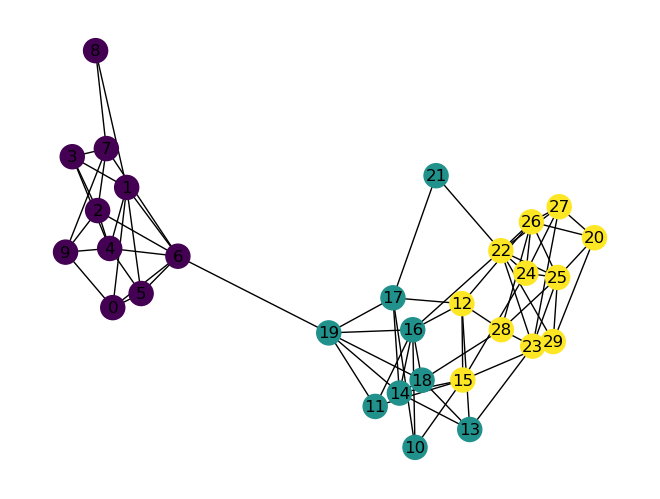

In [5]:
#fin best communities with louvain
partition = nx.community.louvain_communities(G_sbm)

best_partition_map = create_partition_map(partition)
node_colors = [best_partition_map[n] for n in G_sbm.nodes()]
nx.draw(G_sbm,with_labels=True, node_color=node_colors)

It is possible also to create a **disasortative** mixing configuration, where nodes tend to connect more strongly with nodes in different "compartments".

In [ ]:
# Set size of each community
community_sizes = [10, 10, 10]
# Edge probabilities between each community
community_probs = [[0.05, 0.30, 0.50], 
                   [0.30, 0.05, 0.70], 
                   [0.50, 0.70, 0.05]]


G_sbm = nx.stochastic_block_model(community_sizes, community_probs)

In [ ]:
partition = nx.community.louvain_communities(G_sbm)

best_partition_map = create_partition_map(partition)
node_colors = [best_partition_map[n] for n in G_sbm.nodes()]
nx.draw(G_sbm,with_labels=True, node_color=node_colors)

In [30]:
np.version.version

'1.26.4'